In [1]:
# import packages
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np

## Function to Get Squidpy Datasets and do NES

In [2]:
"""""
Title: Function to return the EM and do NES with Squidpy

params:
    adata - anndata
    coord_type - type of coordinate system
    cluster_key - variable where clustering is stored
    spatial_key - where spatial coordinates are stored - for some reason relevant for neighbourhood analysis
    kwargs - passed to plot
    
    
returns: list with both adata and nes
"""""
def get_adata_nes(adata, cluster_key, spatial_key = "spatial", **kwargs):
    sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key=spatial_key)
    sq.gr.nhood_enrichment(adata, cluster_key=cluster_key)
    sq.pl.nhood_enrichment(adata, cluster_key=cluster_key, **kwargs)
    
    # nes
    cats = adata.obs[cluster_key].cat.categories
    nes_key = "{}_nhood_enrichment".format(cluster_key)
    nes = pd.DataFrame(adata.uns[nes_key]['zscore'], index=cats, columns=cats)
    
    both = dict(adata = adata, nes = nes)
    return(both)

/home/dbdimitrov/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


  0%|          | 0/1000 [00:00<?, ?/s]

/home/dbdimitrov/anaconda3/envs/liana_env/lib/python3.8/site-packages/squidpy/pl/_utils.py:573: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  col_ax = divider.append_axes("top", size="5%")


{'adata': AnnData object with n_obs × n_vars = 19416 × 351
     obs: 'Area', 'celltype_mapped_refined'
     uns: 'celltype_mapped_refined_colors', 'spatial_neighbors', 'celltype_mapped_refined_nhood_enrichment'
     obsm: 'X_umap', 'spatial'
     obsp: 'spatial_connectivities', 'spatial_distances',
 'nes':                                 Allantois  Anterior somitic tissues  \
 Allantois                       38.088814                 -1.636609   
 Anterior somitic tissues        -1.638865                 22.095506   
 Cardiomyocytes                  -3.777047                 -4.949895   
 Cranial mesoderm                -3.506837                 11.763731   
 Definitive endoderm             -2.271770                 -1.282354   
 Dermomyotome                    -3.207678                 17.720137   
 Endothelium                     -0.847676                 15.275580   
 Erythroid                       -0.465733                 -2.379168   
 Forebrain/Midbrain/Hindbrain   -10.283326   

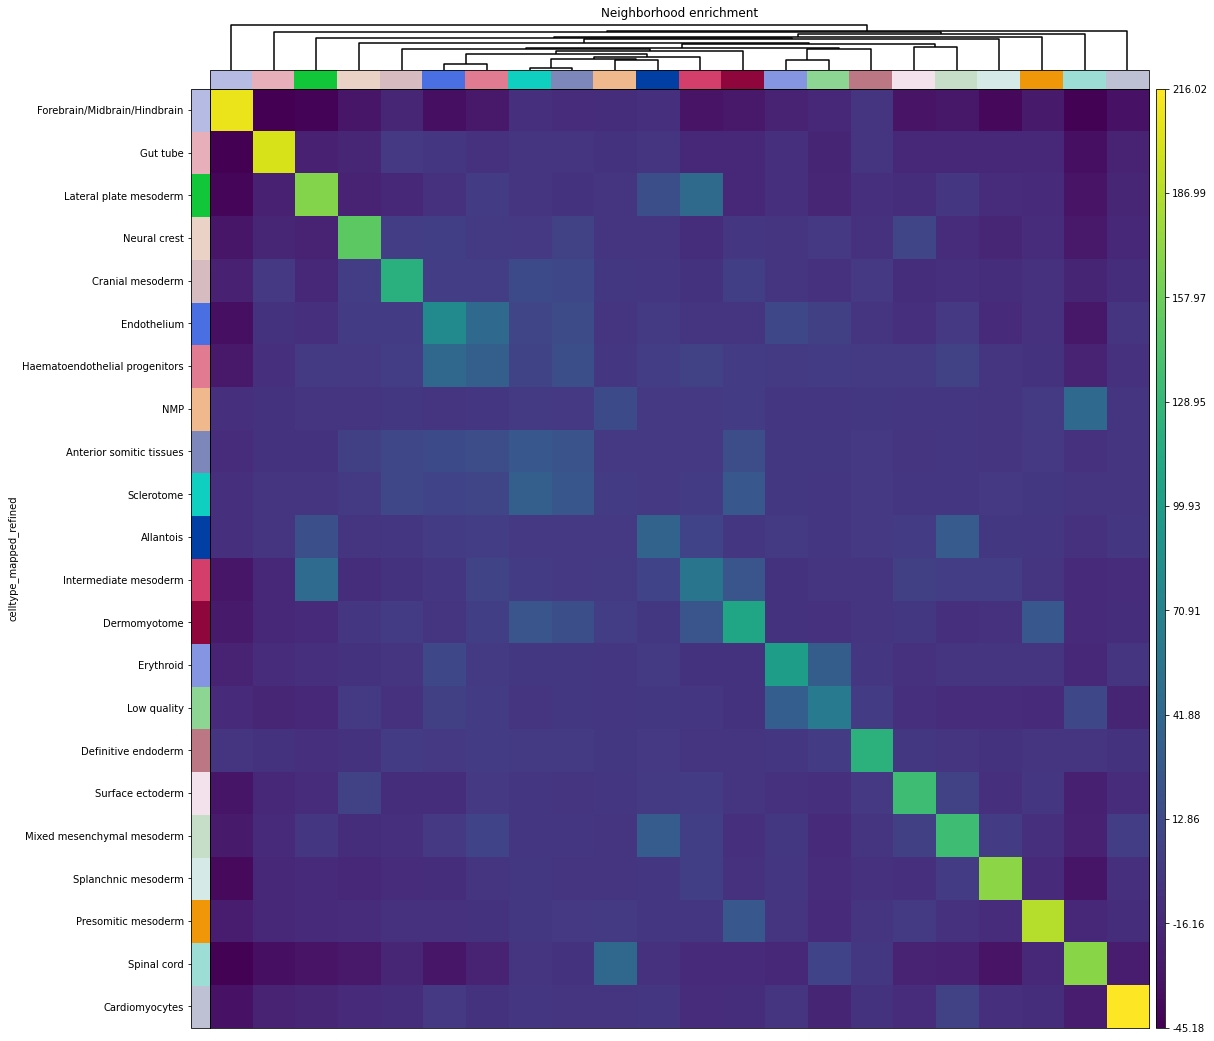

In [3]:
# seqFISH
adata = sq.datasets.seqfish()
get_adata_nes(adata, cluster_key="celltype_mapped_refined", method="ward")

In [ ]:
# merFISH
adata = sq.datasets.merfish()
seq_both = get_adata_nes(adata, cluster_key="Cell_class", spatial_key="spatial3d", method="single", cmap="inferno", vmin=-50, vmax=100)

/home/dbdimitrov/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


  0%|          | 0/1000 [00:00<?, ?/s]

## Datasets as in Squidpy analyses

### SlideSeq

In [ ]:
adata = sq.datasets.slideseqv2()

In [ ]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cluster")

In [ ]:
adata.obsm['deconvolution_results']

## SeqFish

In [ ]:
adata = sq.datasets.seqfish()

In [ ]:
adata

In [ ]:
sc.pl.spatial(adata, color="celltype_mapped_refined", spot_size=0.03)

In [ ]:
help(sq.gr.spatial_neighbors)

In [ ]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined")
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

In [ ]:
nn = sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", copy = True)

In [ ]:
cats = adata.obs["celltype_mapped_refined"].cat.categories

In [ ]:
nes = pd.DataFrame(adata.uns['celltype_mapped_refined_nhood_enrichment']['zscore'],index=cats,columns=cats)

In [ ]:
nes

In [ ]:
help(sq.pl.nhood_enrichment)

In [ ]:

nes

## merFISH

In [ ]:
adata = sq.datasets.merfish()

In [ ]:
adata

In [ ]:
sc.pl.spatial(adata, color="Cell_class", spot_size=0.03)

In [ ]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial3d")
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")

In [ ]:
sq.pl.nhood_enrichment(adata, cluster_key="Cell_class", method="single", cmap="inferno", vmin=-50, vmax=100)

In [ ]:
cluster_key = "Cell_class"
cats = adata.obs[cluster_key].cat.categories
nes_key = "{}_nhood_enrichment".format(cluster_key)

In [ ]:
nes = pd.DataFrame(adata.uns[nes_key]['zscore'],index=cats,columns=cats)

In [ ]:
nes = pd.DataFrame(adata.uns['celltype_mapped_refined_nhood_enrichment']['zscore'],index=cats,columns=cats)

In [ ]:
nes

### Both

In [ ]:
dict(adata = adata,
     nes = nes)